In [12]:
# import sys, os
# sys.path.append(os.path.abspath("../src"))
# import pandas as pd
# import numpy as np
# from regime_model import fit_hmm
# from utils import plot_regimes

# df = pd.read_csv('data/processed/spread.csv', index_col=0, parse_dates=True)

# # If it's a DataFrame with one column, extract the Series
# if df.shape[1] == 1:
#     spread = df.iloc[:, 0]
# else:
#     raise ValueError(f"Expected 1 column in spread.csv, found {df.shape[1]}. Please check the file format.")


# # Check spread is a Series
# if not isinstance(spread, pd.Series):
#     raise TypeError("spread should be a pandas Series, check spread.csv format.")

# # Compute returns and volatility
# returns = spread.diff()
# vol = returns.rolling(5).std()

# # Align both Series and drop NaNs
# features = pd.concat([returns, vol], axis=1)
# features.columns = ['ret', 'vol']
# features.dropna(inplace=True)

# # Sanity check
# if features.empty:
#     raise ValueError("Feature DataFrame is empty after preprocessing. Check spread data quality.")

# # Save features
# os.makedirs('data/processed', exist_ok=True)
# features.to_csv('data/processed/features.csv')

# # Fit HMM
# model, states = fit_hmm(features.values)
# plot_regimes(features['ret'].values, states)


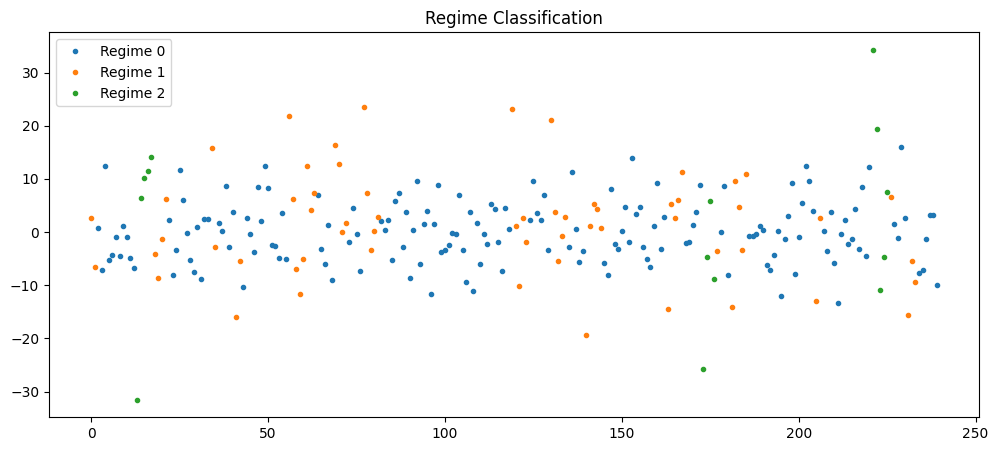

✅ Saved regime states to data/processed/regime_states.txt


In [13]:
import sys, os
sys.path.append(os.path.abspath("../src"))
import pandas as pd
import numpy as np
from regime_model import fit_hmm
from utils import plot_regimes

# Load spread
spread_df = pd.read_csv('data/processed/spread.csv', index_col=0, parse_dates=True)
if spread_df.shape[1] == 1:
    spread = spread_df.iloc[:, 0]
else:
    raise ValueError(f"Expected 1 column in spread.csv, found {spread_df.shape[1]}. Please check the file format.")

# Compute returns and volatility
returns = spread.diff()
vol = returns.rolling(5).std()

# Align and construct features
returns, vol = returns.align(vol, join='inner')
features = pd.concat([returns, vol], axis=1)
features.columns = ['ret', 'vol']
features.dropna(inplace=True)

if features.empty:
    raise ValueError("Feature DataFrame is empty. Check spread.csv and ensure it's non-empty and aligned.")

# Save features
os.makedirs('data/processed', exist_ok=True)
features.to_csv('data/processed/features.csv')

# Fit HMM
model, states = fit_hmm(features.values)
plot_regimes(features['ret'].values, states)

np.savetxt('data/processed/regime_states.txt', states, fmt='%d')
print("✅ Saved regime states to data/processed/regime_states.txt")